In the case of a wheel that rolls without slipping, a constrain equation exists that relates the theta coordinate to the x coordinate. However, such an equation does not exist in a wheel that slips. Can such a wheel be modelling using coupled Euler-Lagrange equations? And can the angular momentum and energy dissipation agree with what we would expect?


$$T = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}mR^2\dot{\theta}^2, $$
$$V = 0 \newline$$

$$L = T - V = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}I\dot{\theta}^2$$

$$\frac{\partial{L}}{\partial{x}} = 0 \text{    and  } \frac{\partial{L}}{\partial{\dot{x}}} = m\dot{v}$$


$$\frac{d}{dt}(\frac{\partial{L}}{\partial{\dot{x}}}) - \frac{\partial{L}}{\partial{x}} = Q_x$$
$$Q_x = -f = -\mu N sign(v_{slip}) = -\mu mg * \text{sign}(v_{slip})$$

Where sign(x) indicates the sign (+ or -) or x, and $v_{slip}$ is the velocity at the point of contact. The force of friction works against the velocity at the point of slippage. 

$$m\ddot{x} = -\mu m g$$
$$\ddot{x} = -\mu  g$$

For $\theta$, 

$$\frac{\partial{L}}{\partial{\theta}} = 0 \text{    and  } \frac{\partial{L}}{\partial{\dot{\theta}}} = I\dot{\theta}$$
$$\frac{d}{dt}(\frac{\partial{L}}{\partial{\dot{\theta}}}) - \frac{\partial{L}}{\partial{\theta}} = Q_{\theta}$$
$$Q_{\theta} = -fR = -\mu mg R \text{sign}(v_{slip}) $$
So, 
$$mR^2\ddot{\theta} = -\mu m g R$$
$$\ddot{\theta} = -\mu \frac{g}{R}$$




In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%matplotlib inline



In [ ]:
# the positive x is to the right
# theta is measured counter clockwise from the positive horizontal
def Sign(x):
    if x >= 0:
        return 1
    else:
        return -1
    
def ODE(t, state, mu, g, R):
    #[xdot, xddot, thetaDot, thetaDDot]
    xDot = state[1]
    xDDot = -mu*g * Sign(state[1] + R*state[3])
    thetaDot = state[3]
    thetaDDot = -mu*g* Sign(state[1] + R*state[3]) / R
    return [xDot, xDDot, thetaDot, thetaDDot]

x0 = 0
v0 = 0
theta0 = 0
omega0 = 30

state0 = [x0, v0, theta0, omega0]

T = 20
sampleSizePerSecond = 5

mu = 0.5
g = 9.81
R = 1

#max_step = 1 step / x seconds
solution = integrate.solve_ivp(fun=ODE, t_span=(0, T ), y0=state0, args=(mu, g, R), max_step=1/sampleSizePerSecond)

timePoints = solution.t
sol = solution.y



22
4.4
velocity: -14.998673928128326
angular velocity: 15.001326071871688
r * angular velocity: 15.001326071871688


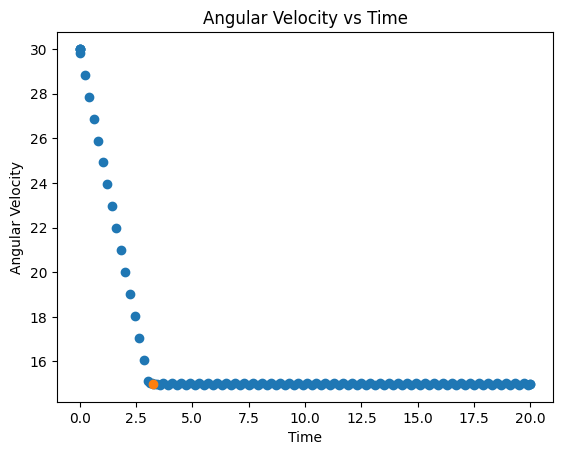

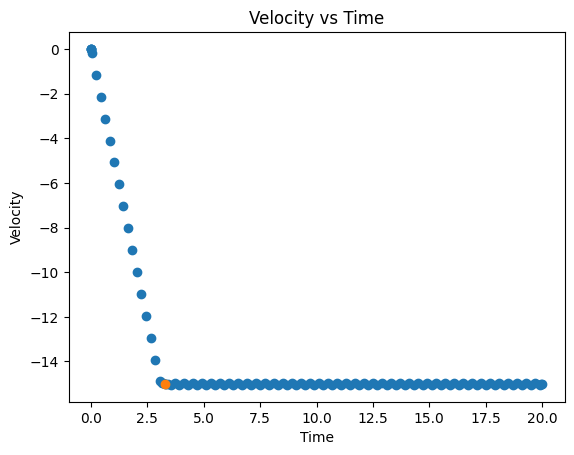

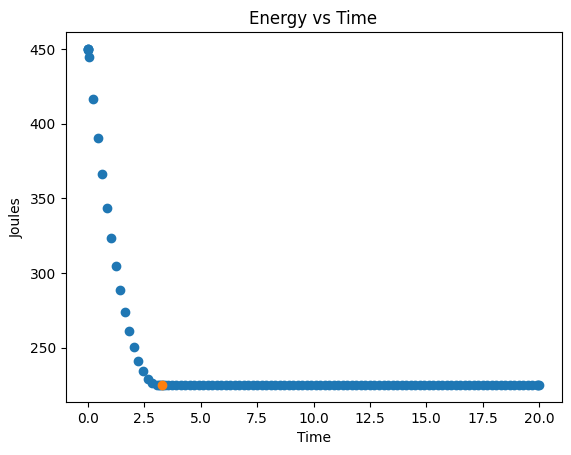

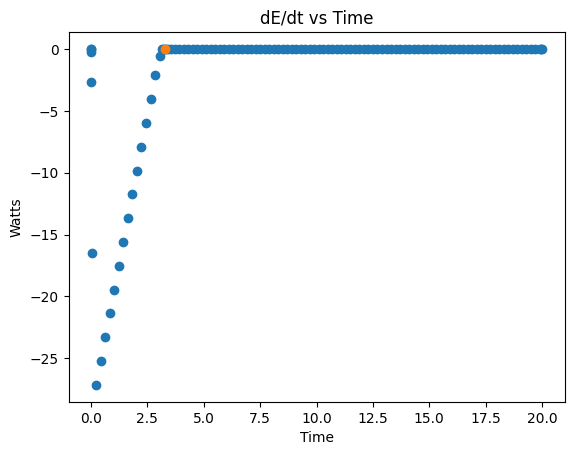

In [157]:
energy = .5*sol[1]**2 + .5*R**2*sol[3]**2
minEnergyIndex = np.where(energy == np.min(energy))[0][0]
print(minEnergyIndex)


plt.figure()
plt.title(f"Angular Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Angular Velocity")
plt.scatter(x= timePoints, y=sol[3])
plt.scatter(x=timePoints[minEnergyIndex], y=(sol[3][minEnergyIndex]))
#plt.show() 

plt.figure()
plt.title(f"Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.scatter(x= timePoints, y=sol[1])
plt.scatter(x=timePoints[minEnergyIndex], y=sol[1][minEnergyIndex])

#plt.show() 

plt.figure()
plt.title(f"Energy vs Time")
plt.xlabel("Time")
plt.ylabel("Joules")
plt.scatter(x= timePoints, y=energy)
plt.scatter(x=timePoints[minEnergyIndex], y=energy[minEnergyIndex])
#plt.show() 

plt.figure()
plt.title(f"dE/dt vs Time")
plt.xlabel("Time")
plt.ylabel("Watts")
plt.scatter(x= timePoints, y=np.gradient(energy))
plt.scatter(x=timePoints[minEnergyIndex], y=np.gradient(energy)[minEnergyIndex])
#plt.show() 

minEnergyIndex = minEnergyIndex
print(minEnergyIndex/sampleSizePerSecond)
print(f'velocity: {sol[1][minEnergyIndex]}')
print(f'angular velocity: {sol[3][minEnergyIndex]}')
print(f'r * angular velocity: {R * sol[3][minEnergyIndex]}')

<h1>Analysis</h1>

Use solve_ivp, not odeint. 

It can handle when degrees of freedom are reduced. 